# Wczytanie i wyczyszczenie danych - Ania

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers
import datetime

In [24]:
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates= {'Datetime' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'])

In [3]:
df.head() 

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [5]:
df.dtypes

Datetime                 datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [6]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [7]:
df.columns

Index(['Datetime', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [25]:
for i in df.columns:
    print(i, sum(df[i].isna()))

Datetime 0
Global_active_power 25979
Global_reactive_power 25979
Voltage 25979
Global_intensity 25979
Sub_metering_1 25979
Sub_metering_2 25979
Sub_metering_3 25979


In [26]:
for i in range(0,8):        
        df.iloc[:,i]=df.iloc[:,i].fillna(df.iloc[:,i].mean())

In [27]:
for i in df.columns:
    print(i, sum(df[i].isna()))

Datetime 0
Global_active_power 0
Global_reactive_power 0
Voltage 0
Global_intensity 0
Sub_metering_1 0
Sub_metering_2 0
Sub_metering_3 0


# Wizualizacja zmienności cech - Ania

In [11]:
cons_by_month = df.groupby(df['Datetime'].dt.strftime('%B')).mean()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December' ]
cons_by_month = cons_by_month.reindex(months)

Text(0.5, 1.0, 'Sub_metering_3')

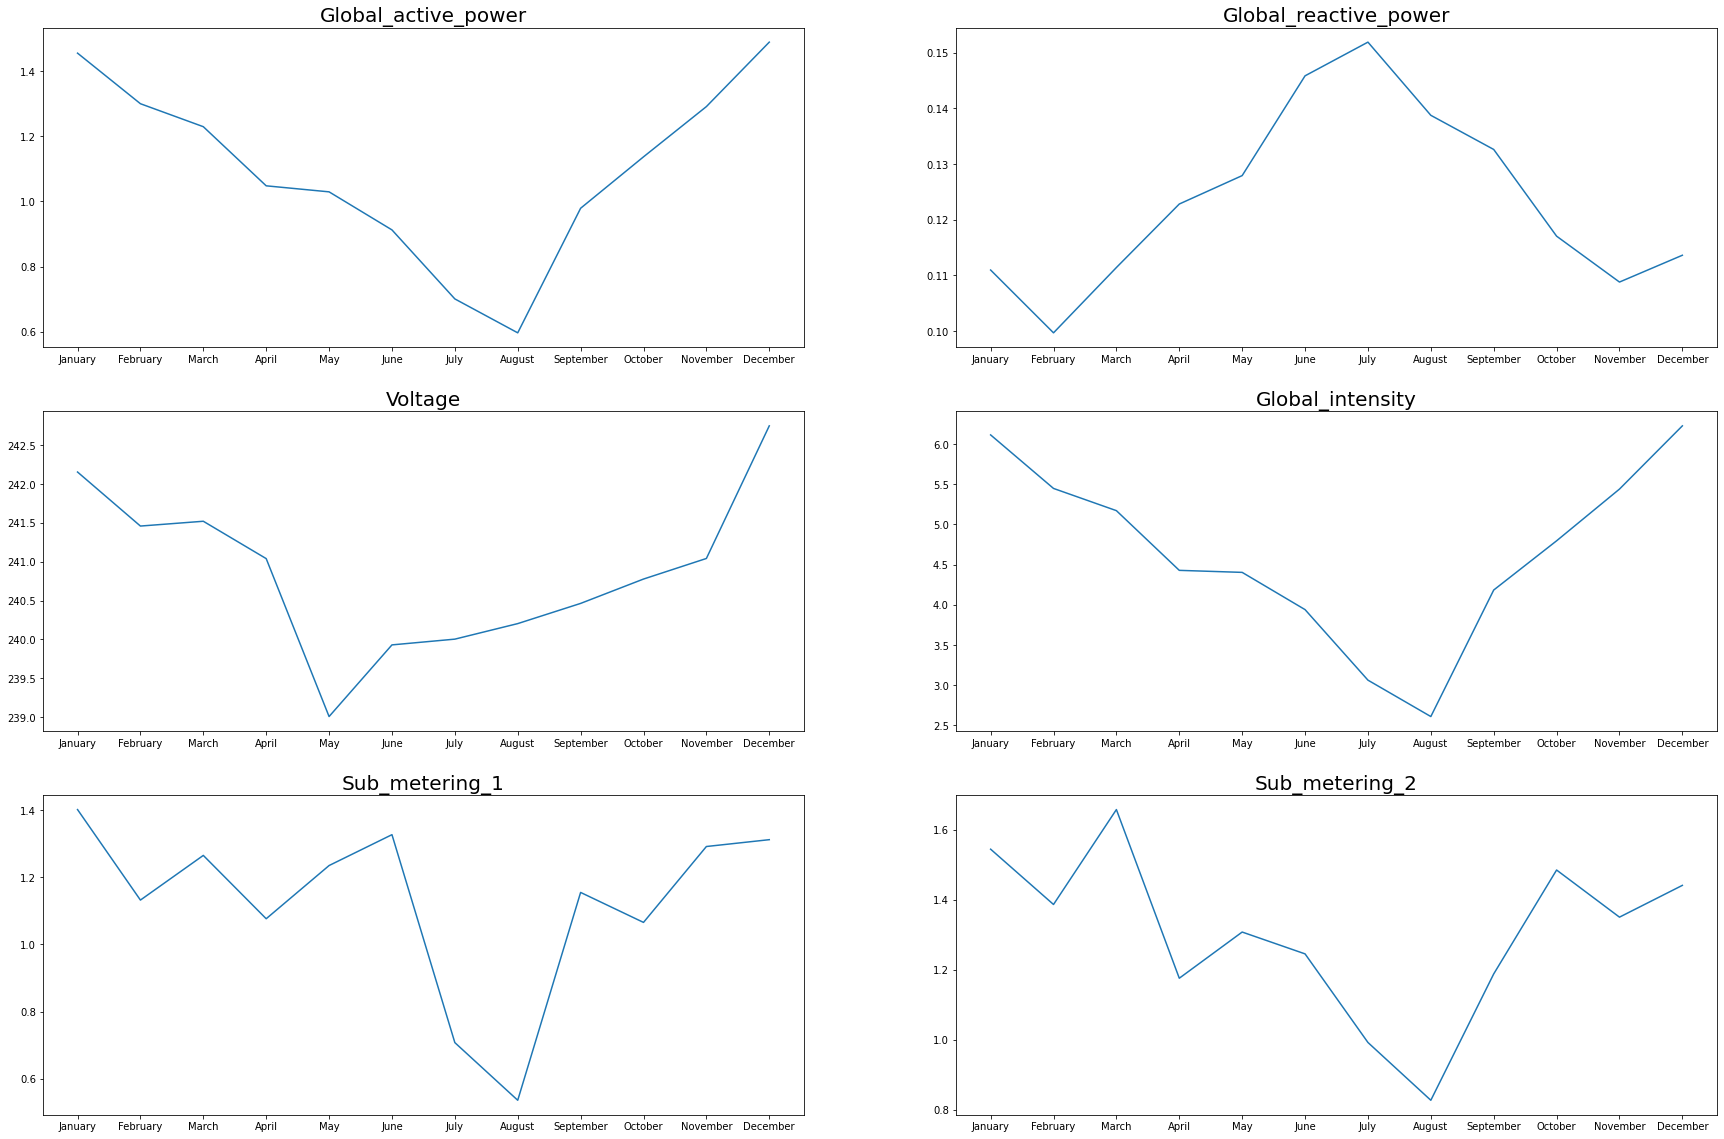

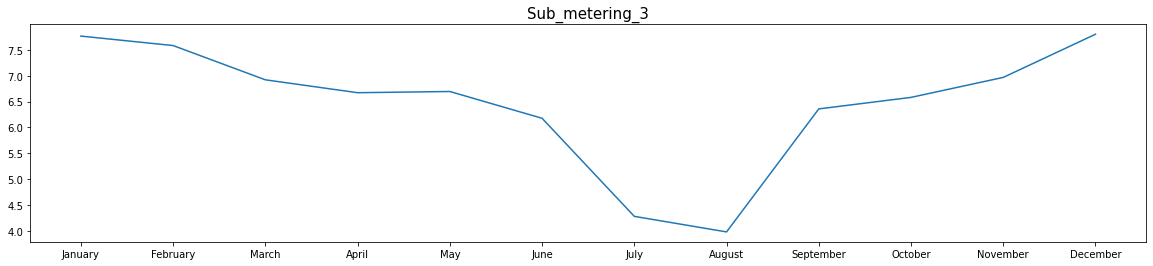

In [53]:
fig, axis = plt.subplots(3, 2, figsize = (30, 20) )
columns = cons_by_month.columns

axis[0, 0].plot(cons_by_month[columns[0]])
axis[0, 0].set_title(columns[0], size = 20)

axis[0, 1].plot(cons_by_month[columns[1]])
axis[0, 1].set_title(columns[1], size = 20)

axis[1, 0].plot(cons_by_month[columns[2]])
axis[1, 0].set_title(columns[2], size = 20)

axis[1, 1].plot(cons_by_month[columns[3]])
axis[1, 1].set_title(columns[3], size = 20)

axis[2, 0].plot(cons_by_month[columns[4]])
axis[2, 0].set_title(columns[4], size = 20)

axis[2, 1].plot(cons_by_month[columns[5]])
axis[2, 1].set_title(columns[5], size = 20)

fig, axs = plt.subplots( figsize = (20, 4))
axs.plot(cons_by_month[columns[6]])
axs.set_title(columns[6], size = 15)



In [13]:
cons_by_days = df.groupby(df['Datetime'].dt.strftime('%A')).mean()
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
cons_by_days = cons_by_days.reindex(days)

Text(0.5, 1.0, 'Sub_metering_3')

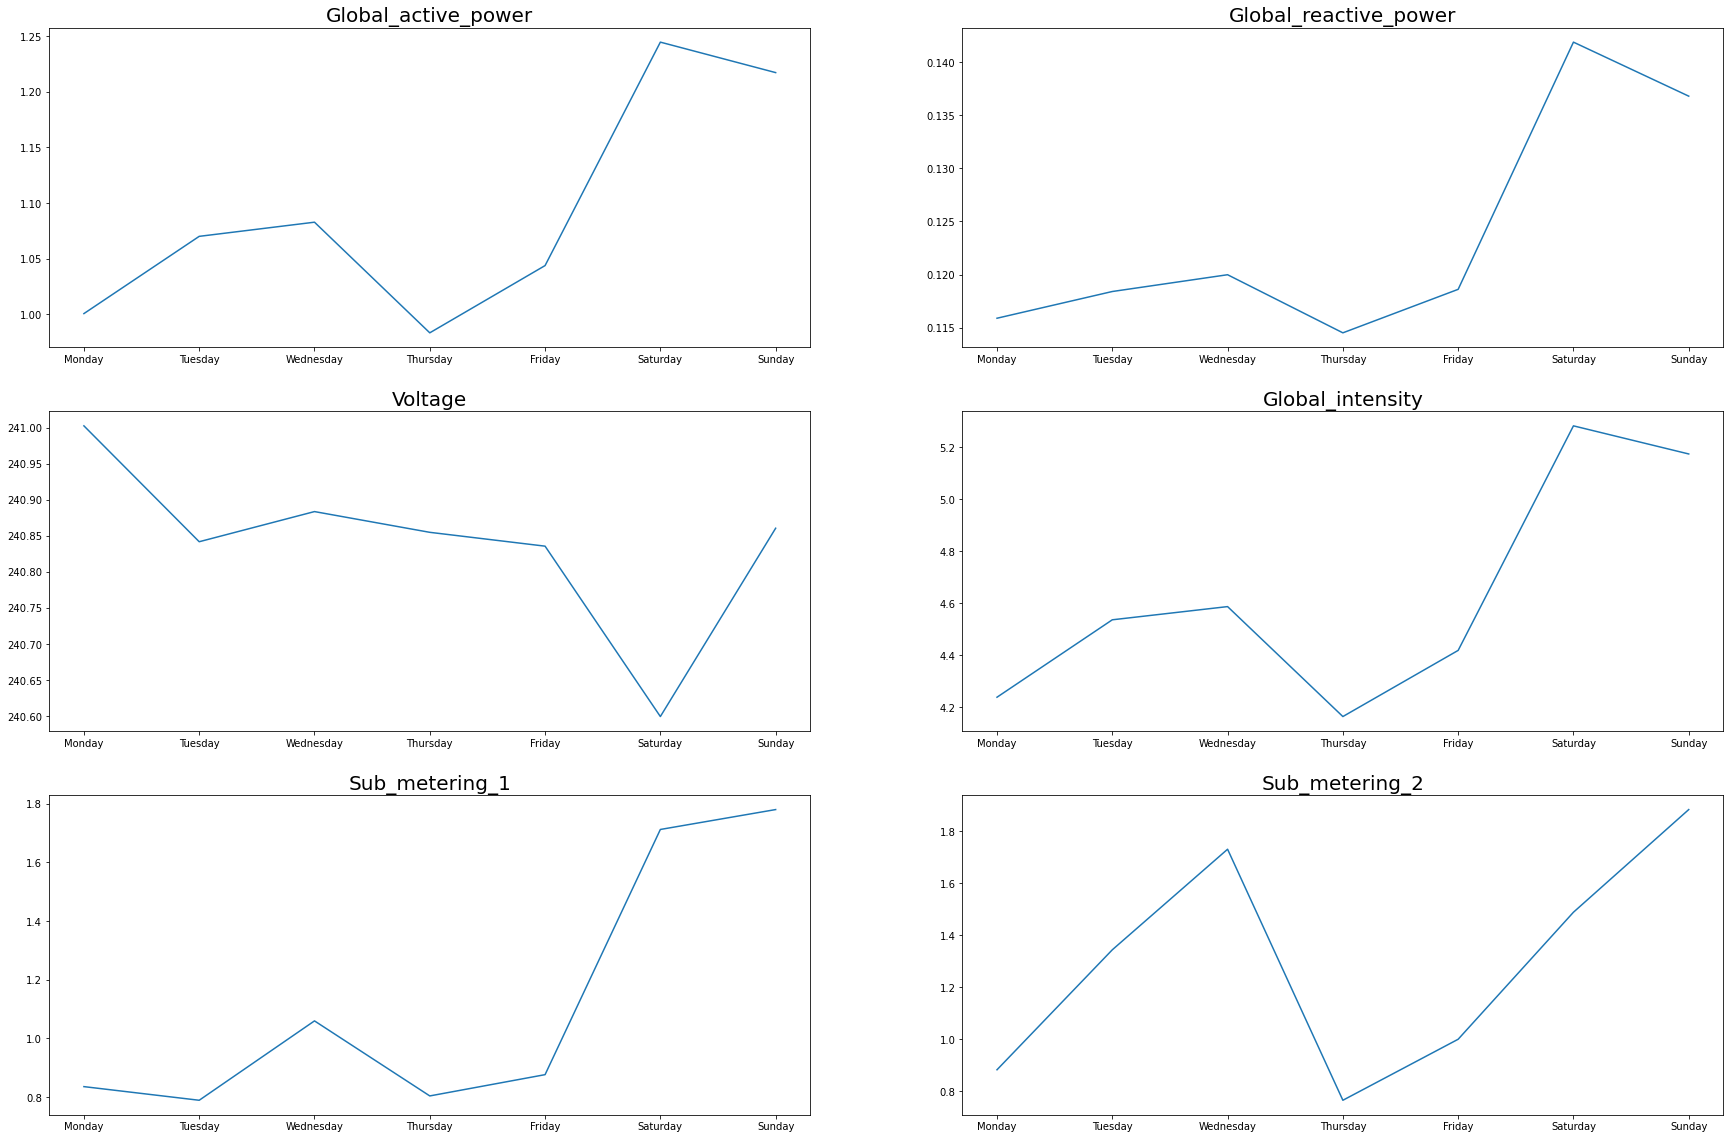

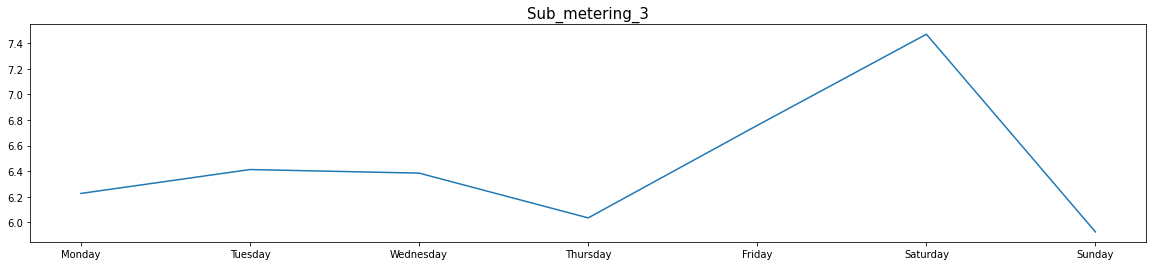

In [58]:
fig, axis = plt.subplots(3, 2, figsize = (30, 20))
columns = cons_by_days.columns

axis[0, 0].plot(cons_by_days[columns[0]])
axis[0, 0].set_title(columns[0], size = 20)

axis[0, 1].plot(cons_by_days[columns[1]])
axis[0, 1].set_title(columns[1], size = 20)

axis[1, 0].plot(cons_by_days[columns[2]])
axis[1, 0].set_title(columns[2], size = 20)

axis[1, 1].plot(cons_by_days[columns[3]])
axis[1, 1].set_title(columns[3], size = 20)

axis[2, 0].plot(cons_by_days[columns[4]])
axis[2, 0].set_title(columns[4], size = 20)

axis[2, 1].plot(cons_by_days[columns[5]])
axis[2, 1].set_title(columns[5], size = 20)

fig, axs = plt.subplots( figsize = (20, 4))
axs.plot(cons_by_days[columns[6]])
axs.set_title(columns[6], size = 15)

# Korelacje - Ania 

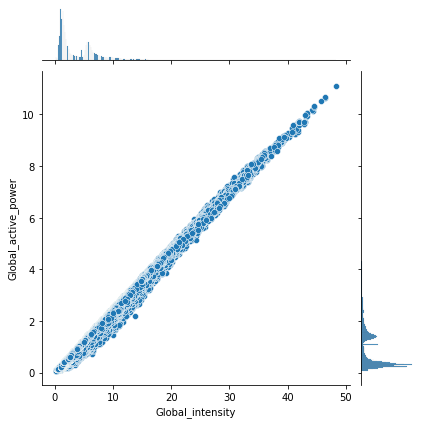

In [15]:
import seaborn as sns
sns.jointplot(x='Global_intensity', y='Global_active_power', data=df)  
plt.show()

#Wyraźna korelacja między zmiennymi

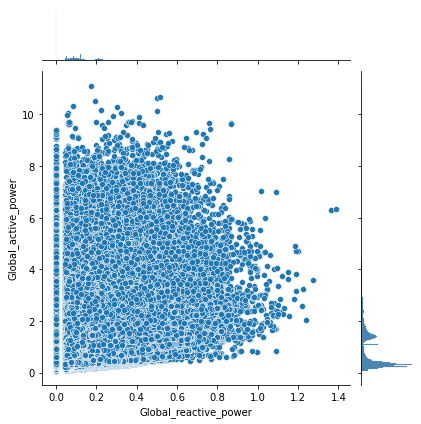

In [16]:
sns.jointplot(x='Global_reactive_power', y='Global_active_power', data=df)  
plt.show()
#brak korelacji między zmiennymi

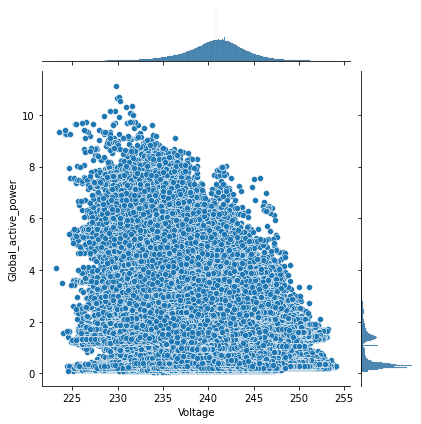

In [17]:
sns.jointplot(x='Voltage', y='Global_active_power', data=df)  
plt.show()
#brak korelacji między zmiennymi

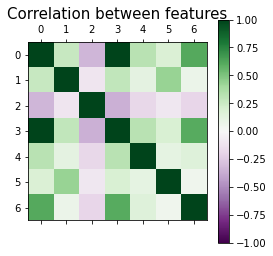

In [18]:
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('Correlation between features', size=15)
plt.colorbar()
plt.show()

# Korelacja i wizualizację w odstępach tygodniowych

In [28]:
# Podzielone na tygodnie dla większej przejrzystości 
# Znaczące korelacje: Global active power z Global intensity, Sub_metering_3 z Global active power 
df = df.set_index('Datetime')
week_df = df.bfill().resample('W').mean()
print(week_df.corr())

                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000              -0.274631  0.271714   
Global_reactive_power            -0.274631               1.000000 -0.037647   
Voltage                           0.271714              -0.037647  1.000000   
Global_intensity                  0.999223              -0.257059  0.244679   
Sub_metering_1                    0.617179              -0.016679 -0.022431   
Sub_metering_2                    0.575414              -0.093169 -0.071493   
Sub_metering_3                    0.804414              -0.126624  0.353056   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.999223        0.617179        0.575414   
Global_reactive_power         -0.257059       -0.016679       -0.093169   
Voltage                        0.244679       -0.022431       -0.071493   
Global_intensity               1.000000        0.625707        0.58

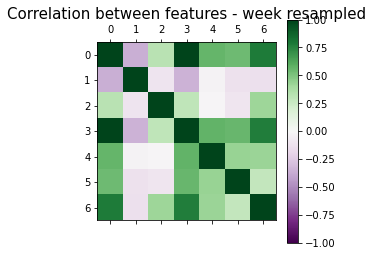

In [60]:
plt.matshow(week_df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('Correlation between features - week resampled', size=15)
plt.colorbar()
plt.show()

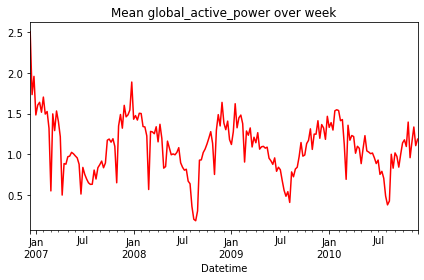

In [44]:
df.Global_active_power.resample('W').mean().plot(title='Mean global_active_power over week', color='red') 
plt.tight_layout()
plt.show()

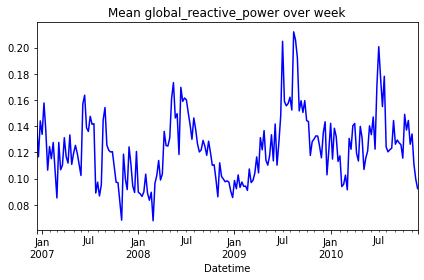

In [43]:
df.Global_reactive_power.resample('W').mean().plot(title='Mean global_reactive_power over week', color='blue') 
plt.tight_layout()
plt.show()

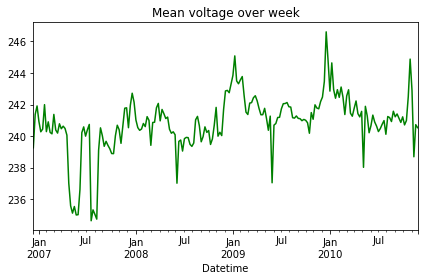

In [42]:
df.Voltage.resample('W').mean().plot(title='Mean voltage over week', color='green') 
plt.tight_layout()
plt.show()

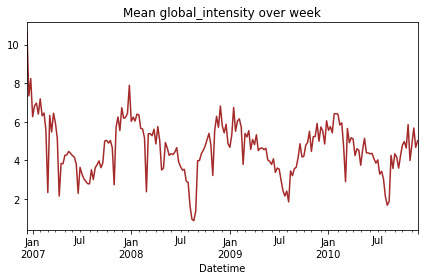

In [46]:
df.Global_intensity.resample('W').mean().plot(title='Mean global_intensity over week', color='brown') 
plt.tight_layout()
plt.show()

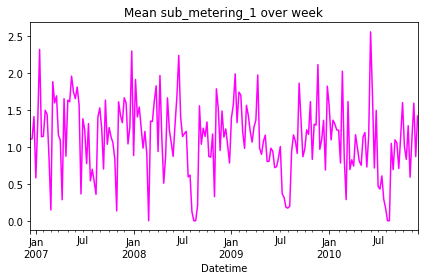

In [50]:
df.Sub_metering_1.resample('W').mean().plot(title='Mean sub_metering_1 over week', color='fuchsia') 
plt.tight_layout()
plt.show()

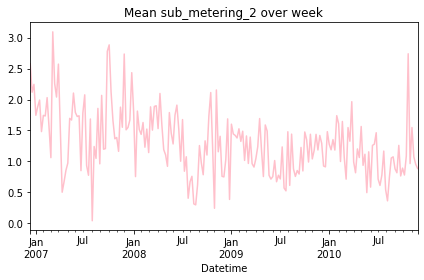

In [49]:
df.Sub_metering_2.resample('W').mean().plot(title='Mean sub_metering_2 over week', color='pink') 
plt.tight_layout()
plt.show()

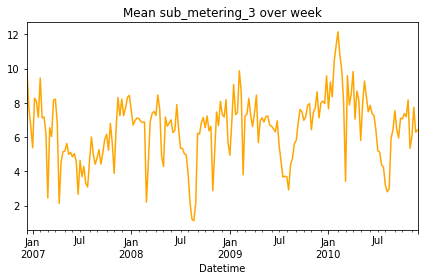

In [51]:
df.Sub_metering_3.resample('W').mean().plot(title='Mean sub_metering_3 over week', color='orange') 
plt.tight_layout()
plt.show()